In [125]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from catboost import CatBoostClassifier
import optuna 
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv('WORK_bank_data_train.csv', sep=';')

In [142]:
df = df.drop(columns='ID')

In [144]:
df['Target1'] = df['Target1'].map({'No': 0, 'Yes': 1})
df['Target2'] = df['Target2'].map({'No': 0, 'Yes': 1})

In [145]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.25, random_state=42)

In [146]:
train.to_parquet('train.parquet')
test.to_parquet('test.parquet')
val.to_parquet('val.parquet')

In [147]:
target1 = 'Target1'
target2 = 'Target2'

# TARGET - 1 

In [19]:
train

,Age,Ind_Household,Age_group,District,Region,Lifetime,Income,Segment,Ind_deposit,Ind_email,...,Ind_salary,trans_6_month,trans_9_month,trans_12_month,amont_trans,amont_day_from,trans_3_month,Gender,Target1,Target2
963695,73.0,No,senior,09,North,4.0,53,Gold,Yes,Yes,...,No,2061.87,3024.89,4070.35,8,24,961.780000,M,Yes,Yes
759675,37.0,No,middle,52,South East,4.0,58,Silver,Yes,Yes,...,No,2017.37,3036.57,4202.14,4,28,935.174529,F,Yes,No
245217,NaN,No,unknown,03,South East,16.0,49,Silver,Yes,Yes,...,No,2044.67,3033.95,4152.95,9,15,991.400000,U,No,No
71316,51.0,No,middle,53,Midlands,5.0,55,Tin,Yes,Yes,...,No,2059.58,3053.52,4111.90,12,15,969.010000,F,No,No
256377,44.0,No,middle,03,South East,7.0,40,Gold,Yes,Yes,...,No,2051.88,3074.08,4110.98,4,16,927.500000,F,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906602,52.0,Yes,middle,49,Midlands,8.0,55,Gold,No,Yes,...,No,2061.03,3102.71,4146.20,8,14,960.200000,M,No,No
829155,62.0,No,senior,32,Unknown,2.0,46,Gold,Yes,Yes,...,No,2119.59,3161.31,4249.55,3,13,984.400000,F,No,No
459940,69.0,No,senior,42,South East,8.0,44,Platinum,Yes,Yes,...,No,2085.08,3056.76,4136.43,5,14,974.060000,M,No,No
296417,76.0,No,senior,50,Unknown,8.0,50,Gold,Yes,Yes,...,No,2108.51,3099.34,4145.69,7,14,929.980000,M,No,No


In [24]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

In [26]:
cat_features = ['Ind_Household',
 'Age_group',
 'District',
 'Region',
 'Segment',
 'Ind_deposit',
 'Ind_email',
 'Ind_phone',
 'Ind_salary',
 'Gender']

In [27]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=[target1, target2]), train[target1], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target1]), verbose=100)

0:	learn: 0.5969396	test: 0.5967728	best: 0.5967728 (0)	total: 202ms	remaining: 3m 21s
100:	learn: 0.2571153	test: 0.2567444	best: 0.2567444 (100)	total: 8.96s	remaining: 1m 19s
200:	learn: 0.2420793	test: 0.2408332	best: 0.2408332 (200)	total: 17.9s	remaining: 1m 11s
300:	learn: 0.2349339	test: 0.2331806	best: 0.2331806 (300)	total: 25.7s	remaining: 59.7s
400:	learn: 0.2300095	test: 0.2280437	best: 0.2280437 (400)	total: 33.9s	remaining: 50.6s
500:	learn: 0.2265526	test: 0.2244983	best: 0.2244983 (500)	total: 42.1s	remaining: 42s
600:	learn: 0.2236009	test: 0.2214960	best: 0.2214960 (600)	total: 50.4s	remaining: 33.4s
700:	learn: 0.2212104	test: 0.2190018	best: 0.2190018 (700)	total: 58.8s	remaining: 25.1s
800:	learn: 0.2191567	test: 0.2168454	best: 0.2168454 (800)	total: 1m 7s	remaining: 16.7s
900:	learn: 0.2173810	test: 0.2150490	best: 0.2150490 (900)	total: 1m 15s	remaining: 8.32s
999:	learn: 0.2155612	test: 0.2131034	best: 0.2131034 (999)	total: 1m 24s	remaining: 0us

bestTest = 0

In [28]:
print(f"TRAIN : {roc_auc_score(train[target1], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target1], model.predict_proba(val.drop(columns=[target1, target2]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target1], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])}")

TRAIN : 0.9543547468456586
VAL : 0.9538066101321312
TEST : 0.9540036842288422


In [36]:
print(classification_report(test[target1], model.predict(test.drop(columns=[target1, target2]))))

              precision    recall  f1-score   support

          No       0.92      0.97      0.94    148281
         Yes       0.90      0.74      0.81     48815

    accuracy                           0.91    197096
   macro avg       0.91      0.86      0.88    197096
weighted avg       0.91      0.91      0.91    197096



In [37]:
res = permutation_importance(model, train.drop(columns=[target1, target2]), train[target1], n_repeats=10, random_state=42)

In [38]:
new_features = [list(train.drop(columns=[target1, target2]).columns)[i] for i in res['importances_mean'].argsort()[::1] if res['importances_mean'][i] - 2*res['importances_std'][i] > 0]



In [39]:
len(new_features)

15

In [40]:
new_features

['trans_12_month',
 'trans_9_month',
 'Ind_phone',
 'Ind_email',
 'trans_6_month',
 'Age_group',
 'Segment',
 'Lifetime',
 'Region',
 'Gender',
 'Income',
 'District',
 'Age',
 'trans_3_month',
 'amont_day_from']

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591285 entries, 963695 to 636609
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             551055 non-null  float64
 1   Ind_Household   591285 non-null  object 
 2   Age_group       591285 non-null  object 
 3   District        591285 non-null  object 
 4   Region          591285 non-null  object 
 5   Lifetime        583726 non-null  float64
 6   Income          591285 non-null  int64  
 7   Segment         591285 non-null  object 
 8   Ind_deposit     591285 non-null  object 
 9   Ind_email       591285 non-null  object 
 10  Ind_phone       591285 non-null  object 
 11  Ind_salary      591285 non-null  object 
 12  trans_6_month   591285 non-null  float64
 13  trans_9_month   591285 non-null  float64
 14  trans_12_month  591285 non-null  float64
 15  amont_trans     591285 non-null  int64  
 16  amont_day_from  591285 non-null  int64  
 17  trans_3_mo

In [149]:
train = train.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_salary', 'amont_trans'])
val = val.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_salary', 'amont_trans'])
test = test.drop(columns=['Ind_Household', 'Ind_deposit', 'Ind_salary', 'amont_trans'])

In [101]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()

In [102]:
cat_features = ['Age_group',
 'District',
 'Region',
 'Segment',
 'Ind_email',
 'Ind_phone',
 'Gender']

In [103]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=[target1, target2]), train[target1], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target1]), verbose=100)

0:	learn: 0.5969396	test: 0.5967728	best: 0.5967728 (0)	total: 116ms	remaining: 1m 56s
100:	learn: 0.2538476	test: 0.2532588	best: 0.2532588 (100)	total: 8.38s	remaining: 1m 14s
200:	learn: 0.2400509	test: 0.2385511	best: 0.2385511 (200)	total: 16.3s	remaining: 1m 4s
300:	learn: 0.2336609	test: 0.2318709	best: 0.2318709 (300)	total: 24.4s	remaining: 56.6s
400:	learn: 0.2290875	test: 0.2272127	best: 0.2272127 (400)	total: 32.4s	remaining: 48.4s
500:	learn: 0.2256301	test: 0.2236177	best: 0.2236177 (500)	total: 40.7s	remaining: 40.5s
600:	learn: 0.2229083	test: 0.2207998	best: 0.2207998 (600)	total: 49s	remaining: 32.6s
700:	learn: 0.2205255	test: 0.2181993	best: 0.2181993 (700)	total: 57.2s	remaining: 24.4s
800:	learn: 0.2182642	test: 0.2159186	best: 0.2159186 (800)	total: 1m 5s	remaining: 16.3s
900:	learn: 0.2166872	test: 0.2143184	best: 0.2143163 (899)	total: 1m 13s	remaining: 8.09s
999:	learn: 0.2153341	test: 0.2129883	best: 0.2129883 (999)	total: 1m 22s	remaining: 0us

bestTest = 0.

In [104]:
print(f"TRAIN : {roc_auc_score(train[target1], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target1], model.predict_proba(val.drop(columns=[target1, target2]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target1], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])}")

TRAIN : 0.9545512903245816
VAL : 0.9539043046445885
TEST : 0.9541896285966176


In [105]:
print(classification_report(test[target1], model.predict(test.drop(columns=[target1, target2]))))

              precision    recall  f1-score   support

          No       0.92      0.97      0.95    148281
         Yes       0.90      0.74      0.81     48815

    accuracy                           0.91    197096
   macro avg       0.91      0.86      0.88    197096
weighted avg       0.91      0.91      0.91    197096



In [106]:
importances = model.get_feature_importance(prettified=True)

In [107]:
importances

,Feature Id,Importances
0,amont_day_from,39.837321
1,trans_3_month,24.326062
2,Income,12.331495
3,Age,6.958667
4,Gender,4.103574
5,Lifetime,3.707424
6,District,3.115106
7,Region,1.683745
8,Segment,1.440515
9,trans_6_month,1.171520


In [108]:
a = importances.loc[importances['Importances'] >= 1, 'Feature Id'].tolist()

In [109]:
a

['amont_day_from',
 'trans_3_month',
 'Income',
 'Age',
 'Gender',
 'Lifetime',
 'District',
 'Region',
 'Segment',
 'trans_6_month',
 'Age_group']

In [150]:
train = train.drop(columns=['Ind_phone', 'Ind_email', 'trans_9_month', 'trans_12_month'])
val = val.drop(columns=['Ind_phone', 'Ind_email', 'trans_9_month', 'trans_12_month'])
test = test.drop(columns=['Ind_phone', 'Ind_email', 'trans_9_month', 'trans_12_month'])

In [156]:
cat_features = train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features

['Age_group', 'District', 'Region', 'Segment', 'Gender']

In [157]:
cat_features = ['Age_group', 'District', 'Region', 'Segment', 'Gender']

In [158]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=3, random_seed=42)
model.fit(train.drop(columns=[target1, target2]), train[target1], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target1]), verbose=100)

0:	learn: 0.5969396	test: 0.5967728	best: 0.5967728 (0)	total: 119ms	remaining: 1m 58s
100:	learn: 0.2550993	test: 0.2546043	best: 0.2546043 (100)	total: 8.27s	remaining: 1m 13s
200:	learn: 0.2398565	test: 0.2383261	best: 0.2383261 (200)	total: 16.5s	remaining: 1m 5s
300:	learn: 0.2336206	test: 0.2317955	best: 0.2317955 (300)	total: 24.7s	remaining: 57.3s
400:	learn: 0.2295286	test: 0.2276711	best: 0.2276711 (400)	total: 32.8s	remaining: 49.1s
500:	learn: 0.2255351	test: 0.2235007	best: 0.2235007 (500)	total: 41.6s	remaining: 41.5s
600:	learn: 0.2226271	test: 0.2205011	best: 0.2205011 (600)	total: 50.4s	remaining: 33.5s
700:	learn: 0.2202213	test: 0.2179595	best: 0.2179595 (700)	total: 59.3s	remaining: 25.3s
800:	learn: 0.2184271	test: 0.2160876	best: 0.2160876 (800)	total: 1m 8s	remaining: 16.9s
900:	learn: 0.2165261	test: 0.2140975	best: 0.2140975 (900)	total: 1m 16s	remaining: 8.42s
999:	learn: 0.2152565	test: 0.2127946	best: 0.2127946 (999)	total: 1m 26s	remaining: 0us

bestTest = 

In [159]:
print(f"TRAIN : {roc_auc_score(train[target1], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])}")
print(f"VAL : {roc_auc_score(val[target1], model.predict_proba(val.drop(columns=[target1, target2]))[:, 1])}")
print(f"TEST : {roc_auc_score(test[target1], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])}")

TRAIN : 0.9546553611639266
VAL : 0.9540271218292133
TEST : 0.9542768927014377


In [160]:
print(classification_report(test[target1], model.predict(test.drop(columns=[target1, target2]))))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95    148281
           1       0.90      0.74      0.81     48815

    accuracy                           0.91    197096
   macro avg       0.91      0.86      0.88    197096
weighted avg       0.91      0.91      0.91    197096



In [161]:
importances = model.get_feature_importance(prettified=True)

In [162]:
importances

,Feature Id,Importances
0,amont_day_from,40.099140
1,trans_3_month,25.303641
2,Income,13.246696
3,Age,6.185055
4,Gender,3.688345
5,Lifetime,3.362178
6,District,2.996136
7,Region,1.657659
8,Segment,1.317864
9,Age_group,1.190153


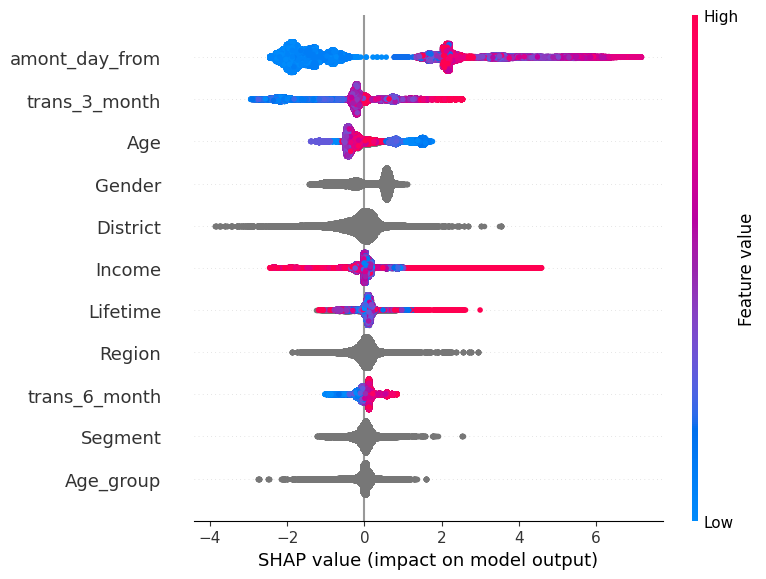

In [166]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(test.drop(columns=[target1, target2]))

shap.summary_plot(shap_values, test.drop(columns=[target1, target2]))

In [153]:
def objective(trial):
    param = {
        "n_estimators": trial.suggest_int('n_estimators', 100, 1000),
        "learning_rate": trial.suggest_float('learning_rate', 0.01, 0.3),
        "objective": trial.suggest_categorical('objective', ["Logloss", "CrossEntropy"]),
        "depth": trial.suggest_int('depth', 3, 10),
        "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
        "colsample_bylevel": trial.suggest_float('colsample_bylevel', 0.01, 1.0),
        "min_child_samples": trial.suggest_float('min_child_samples', 100, 1000, step=100),
        "grow_policy": trial.suggest_categorical('grow_policy', ["SymmetricTree", "Depthwise", "Lossguide"]),
        "border_count": trial.suggest_categorical('border_count', [128, 256, 512]),
        "auto_class_weights": trial.suggest_categorical('auto_class_weight', [None, 'Balanced', 'SqrtBalanced'])
    }

    if param['objective'] == 'CrossEntropy':
        param['auto_class_weights'] = None

    model = CatBoostClassifier(**param, verbose = False, random_seed=42)

    model.fit(train.drop(columns=[target1, target2]), train[target1], cat_features=cat_features, eval_set = (val.drop(columns=[target1, target2]), val[target1]))

    test_roc_auc = roc_auc_score(test[target1], model.predict_proba(test.drop(columns=[target1, target2]))[:, 1])

    train_roc_auc = roc_auc_score(train[target1], model.predict_proba(train.drop(columns=[target1, target2]))[:, 1])

    if train_roc_auc - test_roc_auc > 0.03:
        return 0
    else:
        return test_roc_auc

In [155]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2025-05-06 00:36:19,711] A new study created in memory with name: no-name-d0929a2c-8768-46ce-9b98-32c555566f95
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_22149/2337432607.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "l2_leaf_reg": trial.suggest_loguniform('l2_leaf_reg', 1e-2, 10),
[I 2025-05-06 00:37:23,616] Trial 0 finished with value: 0.9400118471825535 and parameters: {'n_estimators': 881, 'learning_rate': 0.09731734737197249, 'objective': 'CrossEntropy', 'depth': 3, 'l2_leaf_reg': 0.6336381215043078, 'colsample_bylevel': 0.7527415249863493, 'min_child_samples': 400.0, 'grow_policy': 'Depthwise', 'border_count': 256, 'auto_class_weight': 'SqrtBalanced'}. Best is trial 0 with value: 0.9400118471825535.
/var/folders/_k/vxqnb8117qb_1tpg9p98mtyc0000gn/T/ipykernel_22149/2337432607.py:7: FutureWarning: su

KeyboardInterrupt: 

In [ ]:
print(study.best_params)